# Tony Final Project: Analysis of Importance of Combat in Dungeons and Dragon

Dungeons and Dragon(DnD) is a table top role playing game that has a niche past time until recent. Drawing inspiration from various fantasy works, the game allows players to experience and immerse themselves in a thrilling tale and adventure. Part of this experiences offered in these adventures is combat, where a special set of rules are in play to allow these glorious moments to be carried out. 

Being the main component of growth for characters in the game, combat places a heavy importance in the game. This project looks to prove that such importance should be moved elseware as combat in Dungeons and Dragons is not challenging, is predictable, and a solved puzzle.

How CR works https://rpg.stackexchange.com/questions/45926/does-the-challenge-rating-of-a-monster-assume-a-party-or-a-single-pc

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
monsters = pd.read_csv('data/creatures.csv')
monsters.head()


,name,cr,ac,hp,init,att_num,hit_mod,dam_avg
0,Aboleth,10.00,17,135,-1.09,3,9,12
1,Acolyte,0.25,10,9,0.10,1,2,2
2,Adult Black Dragon,14.00,19,195,2.14,3,11,14
3,Adult Blue Dracolich,17.00,19,225,0.10,3,12,15
4,Adult Blue Dragon,16.00,19,225,0.10,3,12,15


Lets do a basic scatter matricies to find any relationship

In [3]:
import seaborn as sns

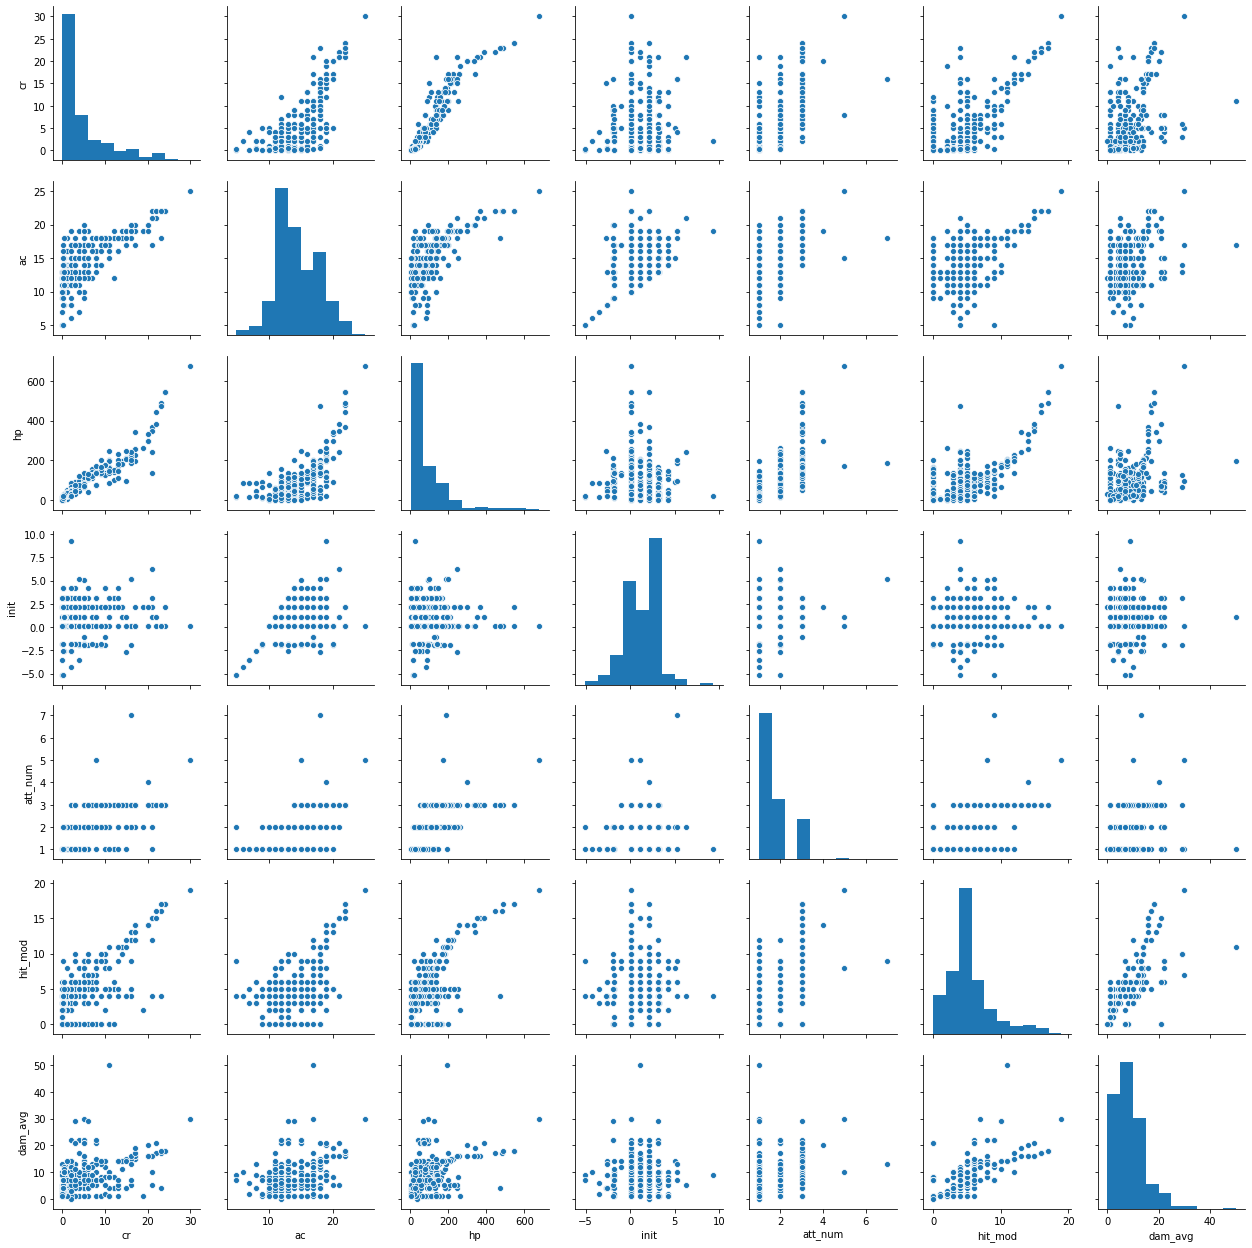

In [4]:
sns.pairplot(monsters)

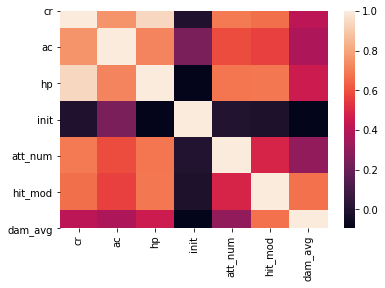

In [8]:
heatmap(monsters.corr())

This is a bit silly, what we want to measure is how each monster grows as its challenge rating grows

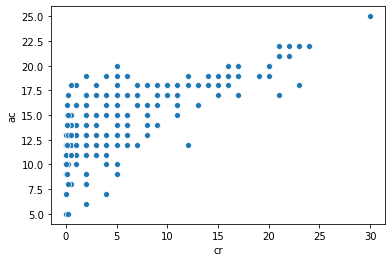

In [17]:
sns.scatterplot(data=monsters, x='cr', y='ac')

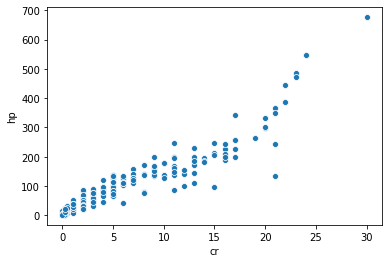

In [11]:
sns.scatterplot(data=monsters, x='cr', y='hp')

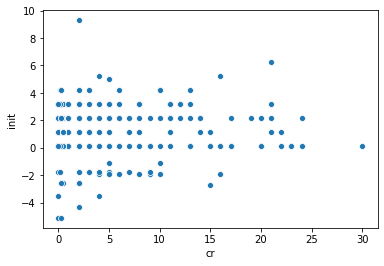

In [10]:
sns.scatterplot(data=monsters, x='cr', y='init')

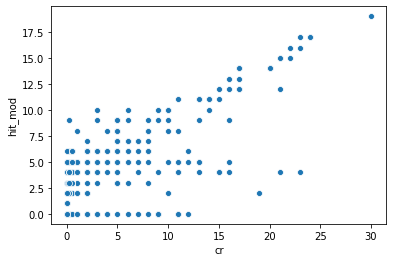

In [12]:
sns.scatterplot(data=monsters, x='cr', y='hit_mod')

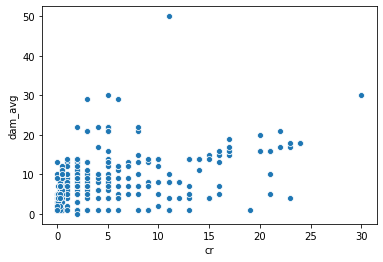

In [13]:
sns.scatterplot(data=monsters, x='cr', y='dam_avg')

We need to compare this data against the player's character data. My first plan is to compare how the character grows in level versus how the monsters grow in level

In [7]:
fighters = pd.read_csv('data/fighters.csv')
wizards = pd.read_csv('data/wizards.csv')
# sns.scatterplot(data=fighters, x='cr', y='ac')

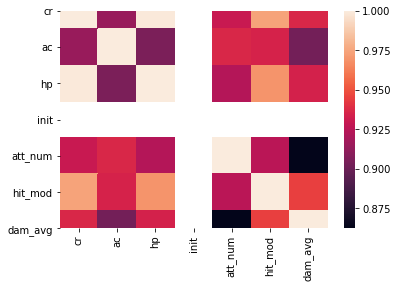

In [11]:
heatmap(fighters.corr())

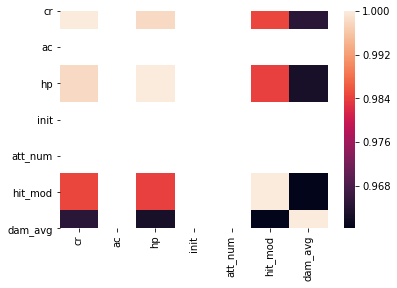

In [12]:
heatmap(wizards.corr())

In [14]:
import statsmodels.formula.api as smf  # import the formula tools

In [230]:
# model = smf.ols(data = monsters, formula = "hp ~ cr")  # create the linear regression model object. 
#                                                # "ols" stands for ordinary least squares.
# result = model.fit()
monsters.sort_values(by=['cr'])

,name,cr,ac,hp,init,att_num,hit_mod,dam_avg
124,Giant Fire Beetle,0.0,13,4,0.10,1,1,2
184,Lemure,0.0,7,13,-3.50,1,3,2
80,Deer,0.0,13,4,3.16,1,2,2
41,Bat,0.0,12,1,2.15,1,0,1
94,Eagle,0.0,12,3,2.15,1,4,4
...,...,...,...,...,...,...,...,...
15,Ancient Blue Dragon,23.0,22,481,0.10,3,16,17
22,Ancient Silver Dragon,23.0,22,487,0.10,3,17,18
21,Ancient Red Dragon,24.0,22,546,0.10,3,17,18
19,Ancient Gold Dragon,24.0,22,546,2.14,3,17,18


In [206]:
fighters

,name,cr,ac,hp,init,att_num,hit_mod,dam_avg
0,Party 1,1,18,48,0,4,5,7
1,Party 2,2,18,80,0,4,5,7
2,Party 3,3,18,112,0,4,5,7
3,Party 4,4,18,144,0,4,5,7
4,Party 5,5,18,176,0,8,6,7
5,Party 6,6,19,212,0,8,7,8
6,Party 7,7,19,248,0,8,7,8
7,Party 8,8,19,284,0,8,7,8
8,Party 9,9,19,320,0,8,8,8
9,Party 10,10,19,356,0,8,8,8


In [236]:
import random
import math

def rollD20():
    return  random.randint(1,20)

def doesItHit(ac, hit_mod):
    hit_roll = hit_mod + rollD20()
#     print('Hit roll was', hit_roll)
    if hit_roll >= ac:
        return True
    else:
        return False
    
def calculatePlayerAttacks(max_hp, current_hp, number_attacks):
    player_hp = max_hp / 4;
#     print(player_hp)
    player_attacks = number_attacks / 4;
#     print(player_attacks)
#     print(max_hp/player_hp)
    result = math.ceil(current_hp/player_hp) * player_attacks
#     print(result)
    return int(result);
    

def combat(creature, party):
    max_hp = party['hp']
    party_hp = party['hp']
    party_dmg = party['dam_avg']
    party_att = party['att_num']
    party_hitmod = party['hit_mod']
    party_ac = party['ac']
    party_init = rollD20()

    
    monster_hp = creature['hp']
    monster_dmg = creature['dam_avg']
    monster_att = creature['att_num']
    monster_hitmod = creature['hit_mod']
    monster_ac = creature['ac']
    monster_init = rollD20() + creature['init']
    
    if party_init >= monster_init:
        init_flag = True;
    else:
        init_flag = False;
    
    while party_hp > 0:
        if init_flag == True :
            party_attacks = calculatePlayerAttacks(max_hp, party_hp, party_att);
#             print("party attacks with" , party_attacks, 'attacks')
            # party gets to attack first
            for x in range(0, party_attacks):
                if doesItHit(monster_ac, party_hitmod):
                    monster_hp = monster_hp - party_dmg
#                     print("monster hurt at", monster_hp)
        else:    
            # monster gets to attack first
#             print("monster attacks")
            for x in range(0, monster_att):
                if doesItHit(party_ac, monster_hitmod):
                    party_hp = party_hp - (monster_dmg)
#                     print("party hurt at", party_hp)
            
        if monster_hp <= 0:
            return True
        elif party_hp <= 0:
            return False
        
        if init_flag == True :
#             print("monster attacks")
            for x in range(0, monster_att):
                if doesItHit(party_ac, monster_hitmod):
                    party_hp = party_hp - monster_dmg 
#                     print("party hurt at", party_hp)
        else:
            party_attacks = calculatePlayerAttacks(max_hp, party_hp, party_att);
#             print("party attacks with" , party_attacks, 'attacks')
            for x in range(0, party_attacks):
                if doesItHit(monster_ac, party_hitmod):
                    monster_hp = monster_hp - party_dmg
#                     print("monster hurt at", monster_hp)
        if monster_hp <= 0:
            return True
        
    return False

tonyparty = {
    'hp': 48,
    'dmg_avg': 7,
    'att_num': 4,
    'hit_mod': 5,
    'ac': 18,
    'init': 0
}

pooopypants = {
    'hp': 90,
    'dmg_avg': 12,
    'att_num': 1,
    'hit_mod': 15,
    'ac': 10,
    'init': 1,
}
monster_dict = monsters.to_dict('index')
fighter_dict = fighters.to_dict('index')
for x in range(0, 100):
    print(combat(monster_dict[19], fighter_dict[9]))
# print(combat(monster_dict[3], fighter_dict[10]))
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
